In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34544_I')

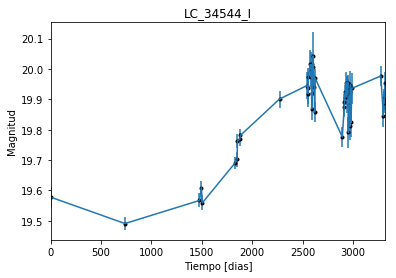

In [3]:
data = np.genfromtxt('LC_34544_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34544_I')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

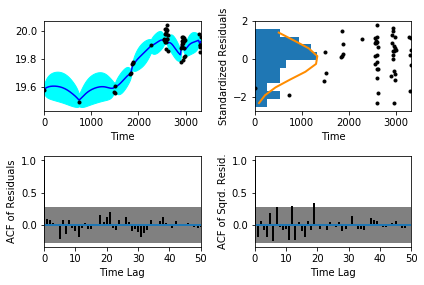

In [6]:
sample.assess_fit()

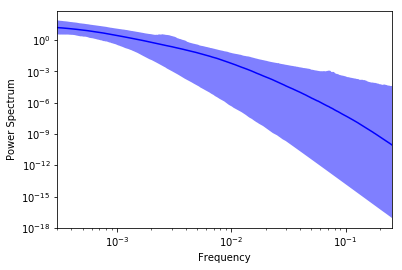

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34544_I')

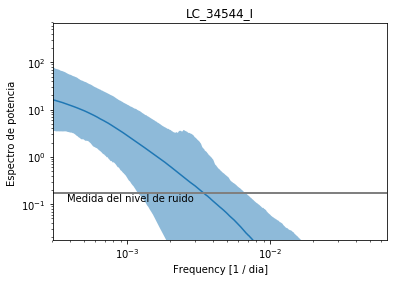

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34544_I')

Text(0.5,1,'Prediccion , valor esperado LC_34544_I')

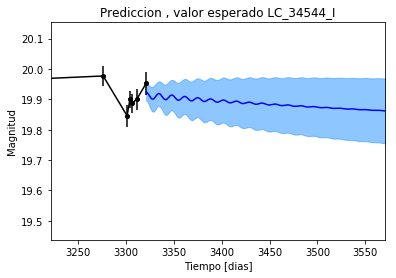

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34544_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34544_I')

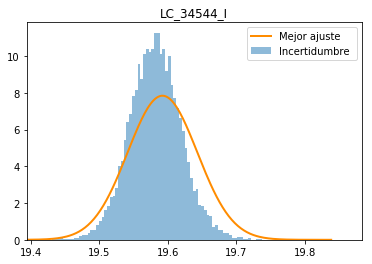

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34544_I')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_I')

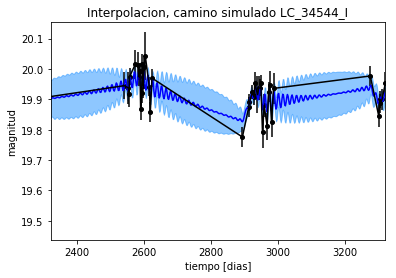

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_I')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_I')

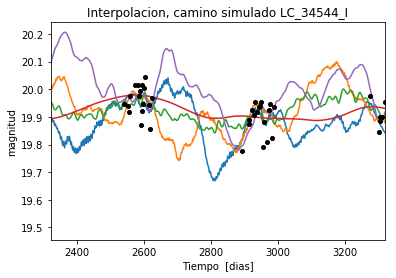

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 737.722586088
Median: 0.00681701295942
Standard deviation: 0.101690592764
68% credibility interval: [ 0.0007185   0.10429407]
95% credibility interval: [  3.32673986e-04   4.05718263e-01]
99% credibility interval: [  3.07645188e-04   4.76244820e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 262.2274529
Median: 0.0012759973074
Standard deviation: 0.046787868009
68% credibility interval: [ 0.00038487  0.01764465]
95% credibility interval: [ 0.00031282  0.16022064]
99% credibility interval: [  3.03730777e-04   3.30969437e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 638.055394023
Median: 0.016021927898
Standard devi

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 646.999813756
Median: 86.5097765697
Standard deviation: 1.77792036072
68% credibility interval: [ 84.53831962  87.89856702]
95% credibility interval: [ 82.12776212  88.96122662]
99% credibility interval: [ 80.10720056  90.25234546]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 414.548728909
Median: 0.411402058948
Standard deviation: 1.14550683342
68% credibility interval: [ 0.04380916  2.0866256 ]
95% credibility interval: [ 0.01165967  3.82714573]
99% credibility interval: [ 0.00934165  5.49539489]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 502.60592203
Median: 0.208875903664
Standard deviation: 2.42124181024
68% credibility interval: [ 0.00854438  2.54386587]
95% credibility interval: [  4.53806597e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15281.9771836
Median: 7.76283458835e-31
Standard deviation: 6.44847736139e+145
68% credibility interval: [  1.23220818e-81   6.42199842e-07]
95% credibility interval: [  2.84133540e-98   1.26128233e+02]
99% credibility interval: [  4.18635159e-106   7.40139361e+130]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2449.04063865
Median: 19.7267112754
Standard deviation: 0.0996235512779
68% credibility interval: [ 19.63894902  19.81172543]
95% credibility interval: [ 19.52659395  19.91715486]
99% credibility interval: [ 19.42026273  20.05547548]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 490.229906254
Median: 0.00874586362405
Standard deviation: 0.126048102944
68% credibility interval: [ 0.          0.20822004]
95% credibility interval: [ 0.          0.43655672]
99% credibility interval: [ 0.          0.49723864]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 490.229906254
Median: 0.00874586362405
Standard deviation: 0.126048102944
68% credibility interval: [ 0.          0.20822004]
95% credibility interval: [ 0.          0.43655672]
99% credibility interval: [ 0.          0.49723864]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 714.475810334
Median: 0.0
Standard deviation: 0.000402656843575
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 646.999813756
Median: 86.5097765697
Standard deviation: 1.77792036072
68% credibility interval: [ 84.53831962  87.89856702]
95% credibility interval: [ 82.12776212  88.96122662]
99% credibility interval: [ 80.10720056  90.25234546]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1631.50303426
Median: 0.0307722470049
Standard deviation: 0.0339066682762
68% credibility interval: [ 0.01816181  0.05732561]
95% credibility interval: [ 0.01191598  0.12407483]
99% credibility interval: [ 0.00902454  0.21100398]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1690.15484378
Median: 1.3441878245
Standard deviation: 0.22991349048
68% credibility interval: [ 1.12350493  1.59720119]
95% credibility interval: [ 0.93339822  1.82155684]
99% credibility interval: [ 0.84258439  1.94130841]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 570.445456442
Median: 5.63357460661e-05
Standard deviation: 0.0169598501929
68% credibility interval: [  5.64989933e-07   1.68976231e-03]
95% credibility interval: [  3.06341409e-09   2.76604282e-02]
99% credibility interval: [  2.69662497e-135   1.15285821e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 737.722586088
Median: (-0.0428325556655-0.0740726580712j)
Standard deviation: 1.01758704749
68% credibility interval: [-0.65529896-1.99172237j -0.00451449-0.57539134j]
95% credibility interval: [ -2.54920303e+00+0.j          -2.09025230e-03-0.11412561j]
99% credibility interval: [ -2.99233446e+00+0.j          -1.93299173e-03-0.16215349j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 262.2274529
Median: (-0.00801732753389+1.44721101253j)
Standard deviation: 0.844784226663
68% credibility interval: [-0.11086458+0.j -0.00241820+0.j]
95% credibility interval: [-1.00669600+1.58393153j -0.00196552+0.j        ]
99% credibility interval: [ -2.07954230e+00+3.13462562j  -1.90839676e-03+0.00538735j]
Posterior summary for parame